In [7]:
import moda
from moda import QEHCParameters, QEHCSolver
import sys
import faulthandler
faulthandler.enable()

params = QEHCParameters()
solver = QEHCSolver()
    
ds1 = moda.DataSet('linear_d8n400_7')
res = solver.Solve(ds1,params)
print(res)

(2.2388938702988526e-08, 0.0, 113, -1, 2607588)


In [10]:
import numpy as np
data = np.array([[2.0,3.0],[3.0,4.0]])

ds2 = moda.DataSet(data)

print(ds2)



NameError: name 'moda' is not defined

[[0.    0.    0.    0.    0.5  ]
 [0.    0.    0.    0.125 0.375]
 [0.    0.    0.    0.25  0.25 ]
 [0.    0.    0.    0.375 0.125]
 [0.    0.    0.    0.5   0.   ]
 [0.    0.    0.125 0.    0.375]
 [0.    0.    0.125 0.125 0.25 ]
 [0.    0.    0.125 0.25  0.125]
 [0.    0.    0.125 0.375 0.   ]
 [0.    0.    0.25  0.    0.25 ]
 [0.    0.    0.25  0.125 0.125]
 [0.    0.    0.25  0.25  0.   ]
 [0.    0.    0.375 0.    0.125]
 [0.    0.    0.375 0.125 0.   ]
 [0.    0.    0.5   0.    0.   ]
 [0.    0.125 0.    0.    0.375]
 [0.    0.125 0.    0.125 0.25 ]
 [0.    0.125 0.    0.25  0.125]
 [0.    0.125 0.    0.375 0.   ]
 [0.    0.125 0.125 0.    0.25 ]
 [0.    0.125 0.125 0.125 0.125]
 [0.    0.125 0.125 0.25  0.   ]
 [0.    0.125 0.25  0.    0.125]
 [0.    0.125 0.25  0.125 0.   ]
 [0.    0.125 0.375 0.    0.   ]
 [0.    0.25  0.    0.    0.25 ]
 [0.    0.25  0.    0.125 0.125]
 [0.    0.25  0.    0.25  0.   ]
 [0.    0.25  0.125 0.    0.125]
 [0.    0.25  0.125 0.125 0.   ]
 [0.    0.

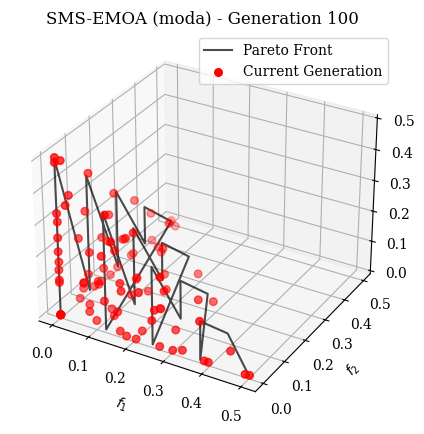

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymoo.optimize import minimize
from pymoo.problems import get_problem
n_obj = 6
problem = get_problem("dtlz1",6,n_obj=n_obj)
algorithm = SMSEMOA()
pf = problem.pareto_front(ref_dirs = UniformReferenceDirectionFactory(n_obj, n_points=126).do())
print(pf)
res = minimize(problem, algorithm, ('n_gen', 100), seed=1, save_history=True)

# 2. Setup the Figure for Animation
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111, projection='3d')
ax2 = fig.add_subplot(112, projection='3d')

ax1.plot(pf[:, 0], pf[:, 1], pf[:, 2], color="black", alpha=0.7, label="Pareto Front")
ax2.plot(pf[:, 3], pf[:, 4], pf[:, 5], color="black", alpha=0.7, label="Pareto Front")
scatter1 = ax1.scatter([], [], [], color="red", s=30, label="Current Generation")
scatter2 = ax2.scatter([], [], [], color="red", s=30, label="Current Generation")

ax1.set_title("SMS-EMOA Convergence. O1-3")
ax2.set_title("SMS-EMOA Convergence. O4-6")
ax1.set_xlabel("$f_1$")
ax2.set_xlabel("$f_1$")
ax1.set_ylabel("$f_2$")
ax2.set_ylabel("$f_2$")
ax1.legend()
ax2.legend()

# 3. Define the Update Function
def update_13(frame):
    print(frame)
    # Get the population objectives at this generation
    F = res.history[frame].opt.get("F")
    scatter1._offsets3d = (F[:, 0], F[:, 1], F[:, 2])
    ax1.set_title(f"SMS-EMOA (moda) - Generation {frame + 1}")
    return scatter1,

def update_46(frame):
    print(frame)
    # Get the population objectives at this generation
    F = res.history[frame].opt.get("F")
    scatter2._offsets3d = (F[:, 3], F[:, 4], F[:, 5])
    ax2.set_title(f"SMS-EMOA (moda) - Generation {frame + 1}")
    return scatter2,


# 4. Create and Show Animation
# interval is delay between frames in milliseconds
ani = FuncAnimation(fig, update_13, frames=len(res.history), interval=50, blit=True)
ani.save('smsemoa_13.mp4')
ani = FuncAnimation(fig, update_13, frames=len(res.history), interval=50, blit=True)
ani.save('smsemoa_46.mp4')
plt.show()

[[0.    0.    0.    0.    0.    0.5  ]
 [0.    0.    0.    0.    0.125 0.375]
 [0.    0.    0.    0.    0.25  0.25 ]
 [0.    0.    0.    0.    0.375 0.125]
 [0.    0.    0.    0.    0.5   0.   ]
 [0.    0.    0.    0.125 0.    0.375]
 [0.    0.    0.    0.125 0.125 0.25 ]
 [0.    0.    0.    0.125 0.25  0.125]
 [0.    0.    0.    0.125 0.375 0.   ]
 [0.    0.    0.    0.25  0.    0.25 ]
 [0.    0.    0.    0.25  0.125 0.125]
 [0.    0.    0.    0.25  0.25  0.   ]
 [0.    0.    0.    0.375 0.    0.125]
 [0.    0.    0.    0.375 0.125 0.   ]
 [0.    0.    0.    0.5   0.    0.   ]
 [0.    0.    0.125 0.    0.    0.375]
 [0.    0.    0.125 0.    0.125 0.25 ]
 [0.    0.    0.125 0.    0.25  0.125]
 [0.    0.    0.125 0.    0.375 0.   ]
 [0.    0.    0.125 0.125 0.    0.25 ]
 [0.    0.    0.125 0.125 0.125 0.125]
 [0.    0.    0.125 0.125 0.25  0.   ]
 [0.    0.    0.125 0.25  0.    0.125]
 [0.    0.    0.125 0.25  0.125 0.   ]
 [0.    0.    0.125 0.375 0.    0.   ]
 [0.    0.    0.25  0.   

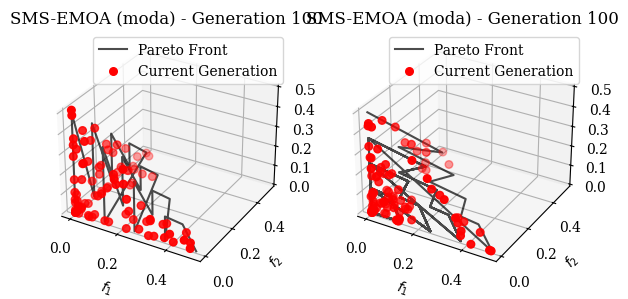

In [ ]:
from pymoo.algorithms.moo.moda.sms_moda import SMSEMOA_MODA
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymoo.optimize import minimize
from pymoo.problems import get_problem

# 1. Setup Problem and Run Optimization once
n_obj = 6
problem = get_problem("dtlz1",6,n_obj=n_obj)
algorithm = SMSEMOA_MODA()
pf = problem.pareto_front(ref_dirs = UniformReferenceDirectionFactory(n_obj, n_points=126).do())
print(pf)
res = minimize(problem, algorithm, ('n_gen', 100), seed=1, save_history=True)

# 2. Setup the Figure for Animation
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.plot(pf[:, 0], pf[:, 1], pf[:, 2], color="black", alpha=0.7, label="Pareto Front")
ax2.plot(pf[:, 3], pf[:, 4], pf[:, 5], color="black", alpha=0.7, label="Pareto Front")
scatter1 = ax1.scatter([], [], [], color="red", s=30, label="Current Generation")
scatter2 = ax2.scatter([], [], [], color="red", s=30, label="Current Generation")

title = fig.suptitle("SMS-EMOA (MODA)", fontsize=14)
ax1.set_xlabel("$f_1$")
ax2.set_xlabel("$f_1$")
ax1.set_ylabel("$f_2$")
ax2.set_ylabel("$f_2$")
ax1.legend()
ax2.legend()

# 3. Define the Update Function
def update_13(frame):
    print(frame)
    # Get the population objectives at this generation
    F = res.history[frame].opt.get("F")
    scatter1._offsets3d = (F[:, 0], F[:, 1], F[:, 2])
    scatter2._offsets3d = (F[:, 3], F[:, 4], F[:, 5])
    title.set_text(f"SMS-EMOA (MODA) – Generation {frame + 1}")
    return scatter1,scatter2



# 4. Create and Show Animation
# interval is delay between frames in milliseconds
ani = FuncAnimation(fig, update_13, frames=len(res.history), interval=50, blit=True)
ani.save('smsemoa_moda.mp4')

plt.show()

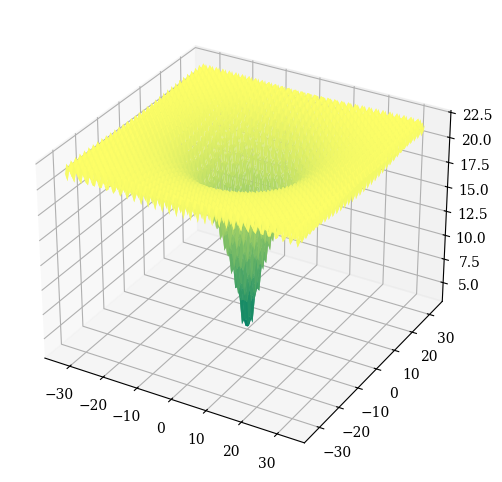

In [19]:
import numpy as np

from pymoo.problems import get_problem
from pymoo.visualization.fitness_landscape import FitnessLandscape

problem = get_problem("ackley", n_var=2, a=20, b=1/5, c=2 * np.pi)

FitnessLandscape(problem, angle=(45, 45), _type="surface").show()